# Combining Data from BLS.gov

###### Reference:
* https://www.bls.gov/oes/tables.htm

In [1]:
# Dependencies and Setup
# import matplotlib.pyplot as plt
import pandas as pd
# import scipy.stats as st
# import numpy as np

In [2]:
# Generate Each CSV file into saperate DataFrames
years = range(1997,2020)
for year in years:
    exec(f"df_{year} = pd.read_csv('ToCombine/{year}.csv')")


In [3]:
# change columns to lower case
years = range(1997,2020)
for year in years:
    exec(f"df_{year}.columns = map(str.lower, df_{year}.columns)")

## Only taking these column
['area', 'state', 'occ_code', 
            'occ_title', 'tot_emp', 'h_mean', 
            'a_mean', 'h_median','a_median','annual', 'year']

* per keys these are the only coulum that should be combined. Please check:
* df_1997.keys()
* df_2019.keys()

In [4]:
# rename occ_titl to occ_title
for year in range(1997, 2020):
    exec(f"df_{year} = df_{year}.rename(columns={{'occ_titl': 'occ_title'}})")
    exec(f"df_{year} = df_{year}.rename(columns={{'year ': 'year'}})")
    exec(f"df_{year} = df_{year}.rename(columns={{'area_title': 'state'}})")       

In [5]:
years=range(2002,2020)
for year in years:
    #a = eval(f"df_{year}")
    #temp_col = [year]*len(a)
    exec(f"df_{year}['year']={year}")

In [6]:
# column list to select from each DataFrame
col_list = ['area', 'state', 'occ_code', 
            'occ_title', 'tot_emp', 'h_mean', 
            'a_mean', 'h_median','a_median','annual', 'year']

In [7]:
# create new clean DataFrame
years = range(1997,2020)

for year in years:
    exec(f"df_{year}_clean = df_{year}[{col_list}]")

In [8]:
df_1997_clean.head()

,area,state,occ_code,occ_title,tot_emp,h_mean,a_mean,h_median,a_median,annual,year
0,1.0,Alabama,10000.0,Managerial and Administrative Occupations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Alabama,13000.0,Staff and Administrative Specialty Managerial ...,**,18.04,37530,16.25,33800,NaN,1997.0
2,1.0,Alabama,13002.0,Financial Managers,8140,24.23,50400,20.97,43618,NaN,1997.0
3,1.0,Alabama,13005.0,"Personnel, Training, and Labor Relations Managers",2760,20.84,43350,19.29,40123,NaN,1997.0
4,1.0,Alabama,13008.0,Purchasing Managers,2370,19.07,39660,15.99,33259,NaN,1997.0


In [9]:
# combine DataFrame
#how='inner'
#on =[['state','occ_title']]
combine_df = pd.DataFrame()
#combine_df[on]=[]

years = range(1997,2020)

for year in years :
    combine_df = pd.concat([combine_df, eval(f"df_{year}_clean")])

combine_df.head()

,area,state,occ_code,occ_title,tot_emp,h_mean,a_mean,h_median,a_median,annual,year
0,1.0,Alabama,10000,Managerial and Administrative Occupations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Alabama,13000,Staff and Administrative Specialty Managerial ...,**,18.04,37530,16.25,33800,NaN,1997.0
2,1.0,Alabama,13002,Financial Managers,8140,24.23,50400,20.97,43618,NaN,1997.0
3,1.0,Alabama,13005,"Personnel, Training, and Labor Relations Managers",2760,20.84,43350,19.29,40123,NaN,1997.0
4,1.0,Alabama,13008,Purchasing Managers,2370,19.07,39660,15.99,33259,NaN,1997.0


In [10]:
len(combine_df)

852558

In [11]:
# drop all in year and tot_emp
combine_df = combine_df.dropna(subset=['year', 'tot_emp'])

In [12]:
temp = combine_df[combine_df['tot_emp'] !='**']
combine_df_clean = temp[temp['tot_emp'] !='*']
combine_df_clean = combine_df_clean[combine_df_clean['h_mean'] !='*']
combine_df_clean = combine_df_clean[combine_df_clean['h_mean'] !='#']
combine_df_clean = combine_df_clean[combine_df_clean['a_mean'] !='*']
combine_df_clean = combine_df_clean[combine_df_clean['a_mean'] !='#']

In [13]:
combine_df_clean.head()

,area,state,occ_code,occ_title,tot_emp,h_mean,a_mean,h_median,a_median,annual,year
2,1.0,Alabama,13002,Financial Managers,8140,24.23,50400,20.97,43618,NaN,1997.0
3,1.0,Alabama,13005,"Personnel, Training, and Labor Relations Managers",2760,20.84,43350,19.29,40123,NaN,1997.0
4,1.0,Alabama,13008,Purchasing Managers,2370,19.07,39660,15.99,33259,NaN,1997.0
5,1.0,Alabama,13011,"Marketing, Advertising, and Public Relations M...",4500,23.76,49420,21.52,44762,NaN,1997.0
6,1.0,Alabama,13014,Administrative Services Managers,2950,20.98,43650,19.32,40186,NaN,1997.0


In [14]:
combine_df_clean1=combine_df_clean.copy()
combine_df_clean1['tot_emp']=combine_df_clean1['tot_emp'].str.replace(",","")
combine_df_clean1['a_mean']=combine_df_clean1['a_mean'].str.replace(",","")

In [15]:
combine_df_clean2=combine_df_clean1.copy()
combine_df_clean2['tot_emp']=combine_df_clean2['tot_emp'].astype(float)
combine_df_clean2['h_mean']=combine_df_clean2['h_mean'].astype(float)m
combine_df_clean2['a_mean']=combine_df_clean2['a_mean'].astype(float)
combine_df_clean2['year']=combine_df_clean2['year'].astype(float)

In [16]:
# print(combine_df['h_mean'].mean())

In [17]:
combine_df_clean = combine_df_clean.reset_index(drop=True)

In [18]:
combine_df_clean.head()

,area,state,occ_code,occ_title,tot_emp,h_mean,a_mean,h_median,a_median,annual,year
0,1.0,Alabama,13002,Financial Managers,8140,24.23,50400,20.97,43618,NaN,1997.0
1,1.0,Alabama,13005,"Personnel, Training, and Labor Relations Managers",2760,20.84,43350,19.29,40123,NaN,1997.0
2,1.0,Alabama,13008,Purchasing Managers,2370,19.07,39660,15.99,33259,NaN,1997.0
3,1.0,Alabama,13011,"Marketing, Advertising, and Public Relations M...",4500,23.76,49420,21.52,44762,NaN,1997.0
4,1.0,Alabama,13014,Administrative Services Managers,2950,20.98,43650,19.32,40186,NaN,1997.0


# Save Clean and Combine Dataframe to CSV

In [19]:
combine_df_clean.to_csv('clean_combine_state_prof_wage_1997-2019.csv',encoding='utf-8-sig',index=False)

##### Occupational Employment Statistics (OES) Survey	
Bureau of Labor Statistics, Department of Labor	
website:  http:/stat.bls.gov/oes/home.htm	
phone:  202-691-6569	
	
Not all fields are available for every set of estimates files	
	
Field	Field Description
prim_state	The primary State for the MSA (only on MSA file)
area	The MSA code or the State fips code
st	The State abbreviation (only on the State file)
state	The State name (only on the State file)
area_name	The MSA name (only on the MSA files)
sic	The Standard Industrial Classification code for the given industry (only on the national industry files)
sic_title	The Standard Industrial Classification title for the given industry (only on the national industry files)
occ_code	The 7-digit Standard Occupational Classification (SOC) code for the occupation
occ_title	The Standard Occupational Classification title for the occupation
group	Contains "major" if this is a SOC major group occupation, otherwise this column is blank
tot_emp	The estimated total employment rounded to the nearest 10 (excludes self-employed)
emp_prse ¹	The percent relative standard error for the employment
pct_total ²	The percent of industry employment in the given occupation (only on the national industry files)
pct_rpt	The percent of establishments reporting the given occupation in the given industry (only on the national industry files)
h_mean	The mean hourly wage
a_mean	The mean annual wage 
mean_prse ¹	The percent relative standard error for the mean wage
h_pct10	The hourly 10th percentile wage
h_pct25	The hourly 25th percentile wage
h_median	The hourly median wage (or the 50th percentile)
h_pct75	The hourly 75th percentile wage
h_pct90	The hourly 90th percentile wage
a_pct10	The annual 10th percentile wage
a_pct25	The annual 25th percentile wage
a_median	The annual median wage (or the 50th percentile)
a_pct75	The annual 75th percentile wage
a_pct90	The annual 90th percentile wage
annual	Contains "TRUE" if only the annual wages are released.  The OES program only releases the annual wage for some occupations that typically work fewer than 2080 hours per year, such as teachers, pilots, and entertainment workers.
year	The reference year of the estimates.  The 2001 estimates contain data collected in 1999, 2000, and 2001.
	
	
Notes:	
¹ Relative Standard Error (RSE) is a measure of the reliability of a statistic; the smaller the relative standard error, the more precise the estimate	
² Percents do not total to 100 due to occupational data not reported	
* = indicates that a wage estimate is not available	
** = indicates that an employment estimate is not available	
*** = The wage data for two occupations, airline pilots, copilots, and flight engineers and flight attendants were removed because of reporting errors.	
#= indicates a wage greater than $70.00 per hour or $145,600 per year 	
	
Estimates for residual, "All Other …" occupations are not available	
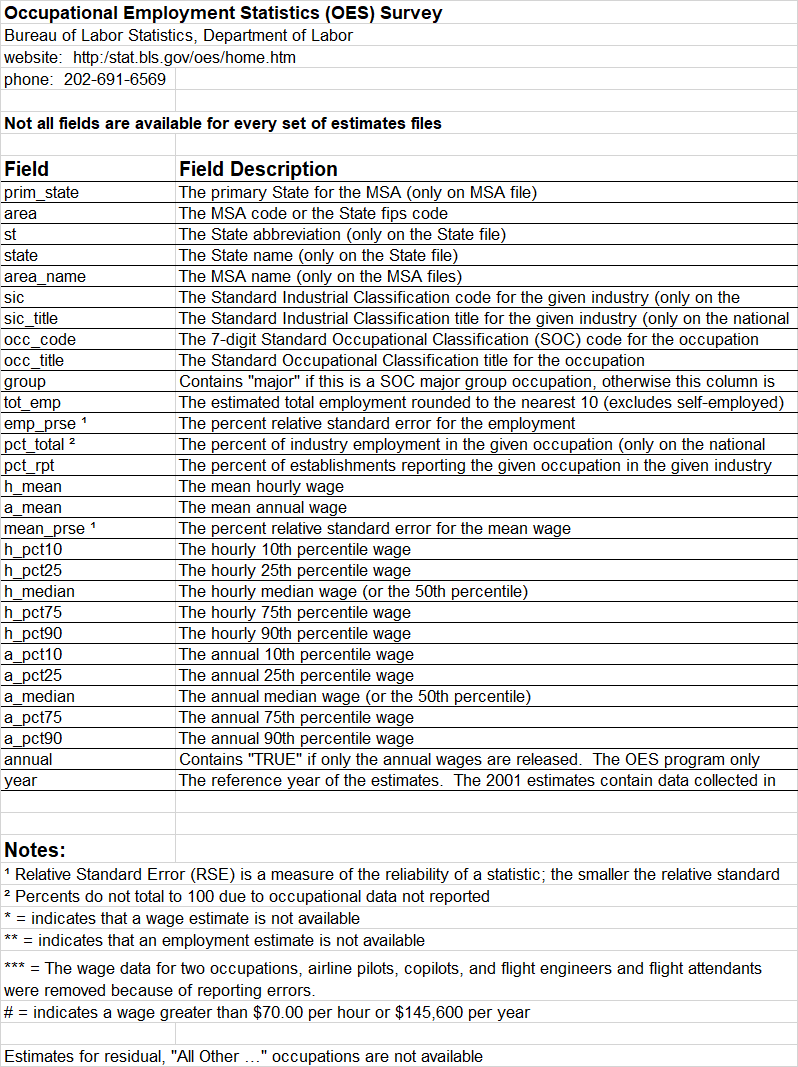